In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [92]:
sophiaorg = pd.read_excel('/Users/georgesba/Desktop/data/sophia.xlsx')
sophia2 = sophiaorg.drop(np.r_[24950:24970, 25477:25489]) #omit male-only data
sophia1 = sophia2.dropna(subset=['ICV'])

In [93]:
All = sophia1.sort_values(by='age')
IMAGEN = sophia1.iloc[0:1840].sort_values(by='age')
HCP_Aging = sophia1.iloc[1840:3678].sort_values(by='age')
HCP_Development = sophia1.iloc[3678:4330].sort_values(by='age')
CMI = sophia1.iloc[4330:4544].sort_values(by='age')
Cam_CAN = sophia1.iloc[4544:5187].sort_values(by='age')
ABIDE = sophia1.iloc[5187:5628].sort_values(by='age')
ABCD = sophia1.iloc[6447:10206].sort_values(by='age')
UK_BIOBANK = sophia1.iloc[10346:24842].sort_values(by='age')
Beijing_Zang = sophia1.iloc[24950:25148].sort_values(by='age')
Cambridge = sophia1.iloc[25174:25372].sort_values(by='age')

In [94]:
window_step_sizes = {
    'All': (5, 1),
    'IMAGEN': (5, 1),
    'HCP_Aging': (5, 1),
    'HCP_Development': (5, 1),
    'CMI': (5, 1),
    'Cam_CAN': (5, 1),
    'ABIDE': (5, 1),
    'ABCD': (5, 1),
    'UK_BIOBANK': (5, 1),
    'Beijing_Zang': (5, 1),
    'Cambridge': (5, 1),
}

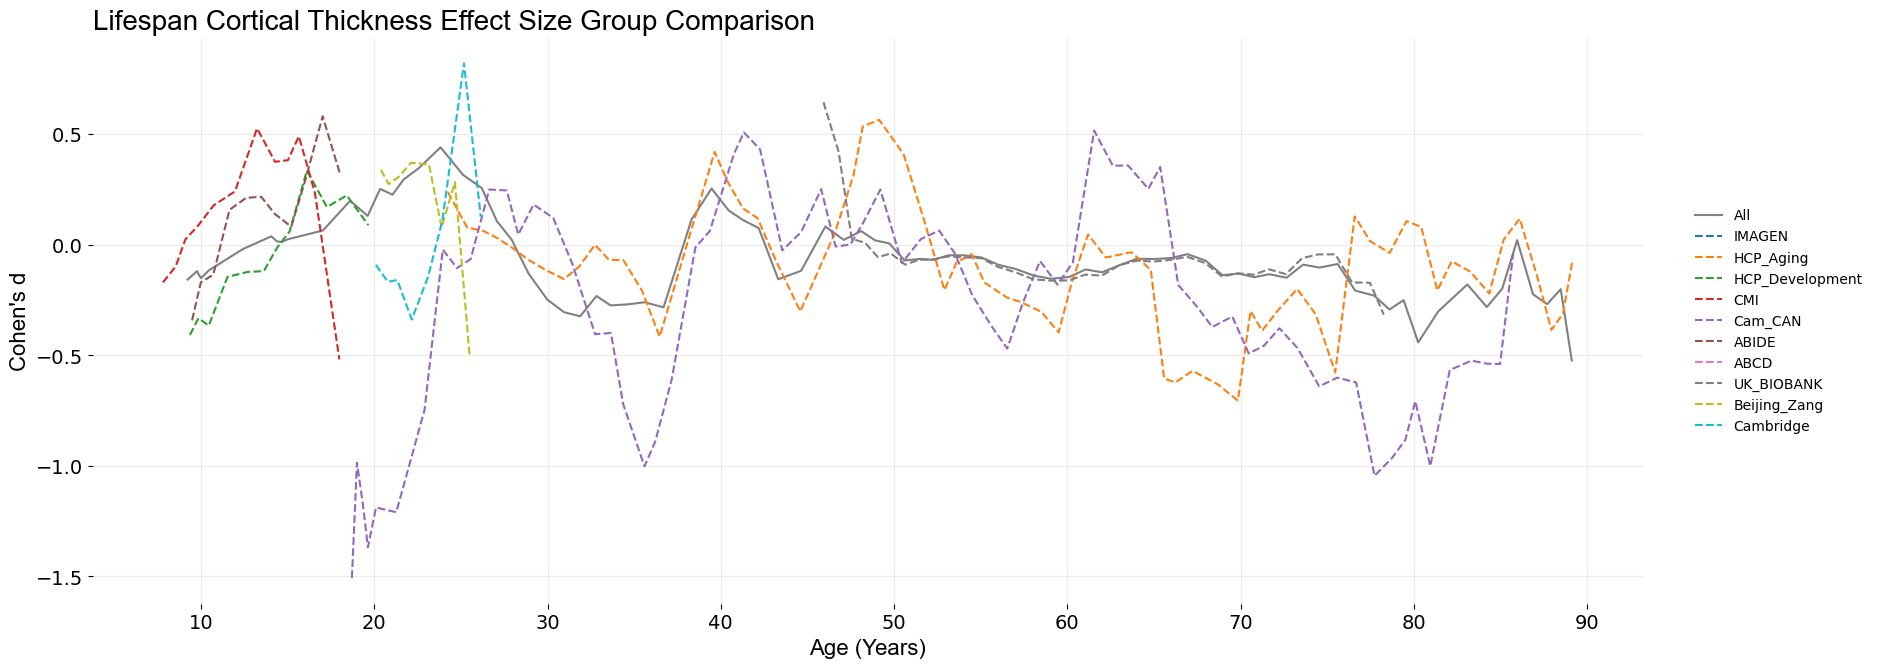

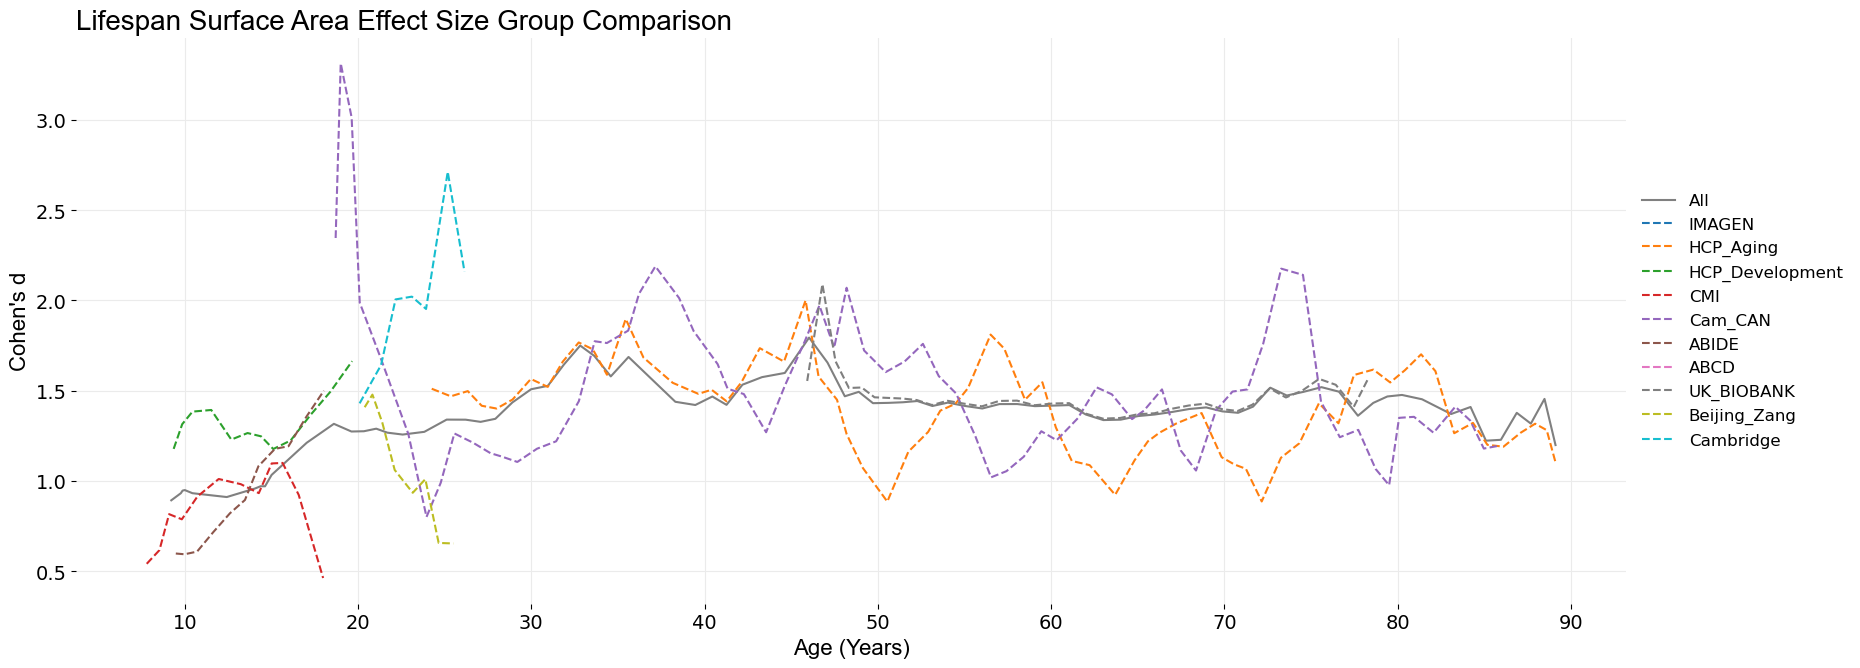

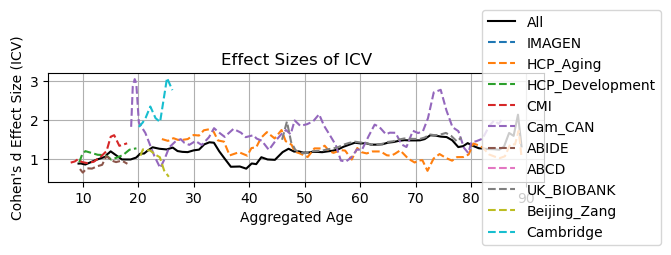

In [96]:
def calculate_avg_surface_area(df):
    return (df['LSurfArea'] + df['RSurfArea']) / 2

def calculate_avg_thickness(df):
    return (df['LThickness'] + df['RThickness']) / 2

def analyze_dataset_age(dataset, dataset_name, window_size_age, step_size_age):
    cohens_d_surf_area = []
    cohens_d_thickness = []
    cohens_d_icv = []
    window_age = []
    
    def cohen_d(male_data, female_data):
        pooled_std = np.sqrt((male_data.std() ** 2 + female_data.std() ** 2) / 2)
        return (male_data.mean() - female_data.mean()) / pooled_std

    min_age = round(dataset['age'].min())
    max_age = round(dataset['age'].max())
    
    for age_group in range(min_age, max_age - window_size_age + 1, step_size_age):
            window = dataset[(dataset['age'] >= age_group) & (dataset['age'] < age_group + window_size_age)].copy()

            window.loc[:, 'AvgSurfArea'] = calculate_avg_surface_area(window)
            window.loc[:, 'AvgThickness'] = calculate_avg_thickness(window)
        
            male_data = window[window['sex'] == 1]
            female_data = window[window['sex'] == 2]

            if len(male_data) > 0 and len(female_data) > 0:
                window_age.append(window['age'].mean())
                cohens_d_surf_area.append(cohen_d(male_data['AvgSurfArea'], female_data['AvgSurfArea']))
                cohens_d_thickness.append(cohen_d(male_data['AvgThickness'], female_data['AvgThickness']))
                cohens_d_icv.append(cohen_d(male_data['ICV'], female_data['ICV']))
    
    return cohens_d_surf_area, cohens_d_thickness, cohens_d_icv, window_age

cohens_d_surf_area_all = []
cohens_d_thickness_all = []
cohens_d_icv_all = []
window_age_all = []

for dataset_name, (window_size, step_size) in window_step_sizes.items():
    dataset = globals()[dataset_name]
    cohens_d_surf_area, cohens_d_thickness, cohens_d_icv, window_age = analyze_dataset_age(dataset, dataset_name, int(window_size), int(step_size))
    cohens_d_surf_area_all.append(cohens_d_surf_area)
    cohens_d_thickness_all.append(cohens_d_thickness)
    cohens_d_icv_all.append(cohens_d_icv)
    window_age_all.append(window_age)

plt.figure(figsize=(20, 25))
# Plot for Cortical Thickess
plt.subplot(3, 1, 1)
for i, dataset_name in enumerate(window_step_sizes.keys()):
    if dataset_name == 'All':
        plt.plot(window_age_all[i], cohens_d_thickness_all[i], label=f'{dataset_name}', linestyle='-', color='grey')
    else:
        plt.plot(window_age_all[i], cohens_d_thickness_all[i], label=f'{dataset_name}', linestyle='--')
plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
plt.ylabel("Cohen's d", fontname='Arial', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Lifespan Cortical Thickness Effect Size Group Comparison', fontname='Arial', fontsize=20, loc = 'left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.legend(loc='right', bbox_to_anchor=(1.15, .5), frameon=False, fontsize=10)
plt.show()

# Plot for Surface Area
plt.figure(figsize=(20, 25))
plt.subplot(3, 1, 2)
for i, dataset_name in enumerate(window_step_sizes.keys()):
    if dataset_name == 'All':
        plt.plot(window_age_all[i], cohens_d_surf_area_all[i], label=f'{dataset_name}', linestyle='-', color='grey')
    else:
        plt.plot(window_age_all[i], cohens_d_surf_area_all[i], label=f'{dataset_name}', linestyle='--')
plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
plt.ylabel("Cohen's d", fontname='Arial', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Lifespan Surface Area Effect Size Group Comparison', fontname='Arial', fontsize=20, loc = 'left')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.legend(loc='right', bbox_to_anchor=(1.15, .5), frameon=False, fontsize=12)
plt.show()

# Plot for ICV
plt.subplot(3, 1, 3)
for i, dataset_name in enumerate(window_step_sizes.keys()):
    if dataset_name == 'All':
        plt.plot(window_age_all[i], cohens_d_icv_all[i], label=f'{dataset_name}', linestyle='-', color='black')
    else:
        plt.plot(window_age_all[i], cohens_d_icv_all[i], label=f'{dataset_name}', linestyle='--')
plt.xlabel('Aggregated Age')
plt.ylabel("Cohen's d Effect Size (ICV)")
plt.title("Effect Sizes of ICV")
plt.legend(loc = 'right', bbox_to_anchor=(1.25, .5))
plt.grid(True)
plt.show()